# Problem 1
Problem Statement 1:
There is an automobile company Cars24X7 from India  which aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Japanese market.  Essentially, the company wants to know:
Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered  a large dataset of different types of cars across the American market.
Business Objectives:
You as a Data scientist are required to apply some data science techniques  for the price of cars with the available independent variables.  That should help the management to understand how exactly the prices vary with the independent variables. 
 They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
 Also build the Random Forest Regressor for optimal search of classifiers.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

In [2]:
data=pd.read_excel('data1.xlsx',header=[1])[:299]

In [3]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0
1,sx4,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0
2,ciaz,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0
3,wagon r,2011.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0
4,swift,2014.0,4.6,6.87,42450.0,Diesel,Dealer,Manual,0.0
...,...,...,...,...,...,...,...,...,...
294,city,2015.0,8.55,13.09,60076.0,Diesel,Dealer,Manual,0.0
295,city,2016.0,9.5,11.6,33988.0,Diesel,Dealer,Manual,0.0
296,brio,2015.0,4.0,5.9,60000.0,Petrol,Dealer,Manual,0.0
297,city,2009.0,3.35,11.0,87934.0,Petrol,Dealer,Manual,0.0


# Data understanding & exploration

In [4]:
data.shape

(299, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    object 
 2   Selling_Price  299 non-null    object 
 3   Present_Price  299 non-null    object 
 4   Kms_Driven     299 non-null    object 
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    float64
dtypes: float64(1), object(8)
memory usage: 21.1+ KB


In [6]:
data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,299,299.0,299.00,299.0,299.0,299,299,299,299.000000
unique,97,16.0,156.00,146.0,204.0,3,2,2,NaN
top,city,2015.0,0.45,9.4,45000.0,Petrol,Dealer,Manual,NaN
freq,26,60.0,8.00,15.0,9.0,238,193,259,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043478
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.248720
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


# Data cleaning

In [7]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

* we dont have any missing values in tha dataset

In [8]:
data.duplicated().sum()

2

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

* we have 2 duplicate rows so we have removed that...

# Exploratory data analysis

### lets first check our target column 'Selling price'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


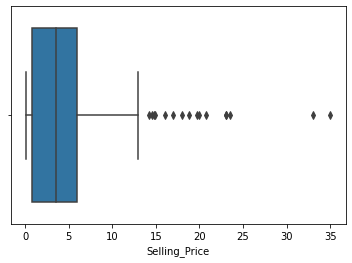

In [11]:
sns.boxplot(data['Selling_Price'])

In [12]:
len(data[data['Selling_Price']>13])

16

* we can see, there is atleast 16 outliers..
* so, we will convert the outliers to upper fence of the data

In [13]:
data['Selling_Price'] = np.where(data['Selling_Price'] > 13, 13, data['Selling_Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


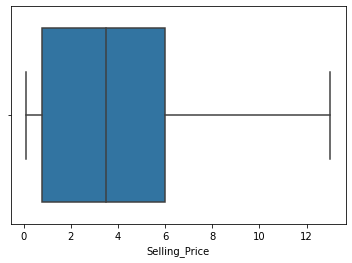

In [14]:
sns.boxplot(data['Selling_Price'])

In [15]:
data['binned_selling_price']=pd.cut(data.Selling_Price, bins=5)

* I have binned the Selling Price column into 5 bins so that It would be EASY to do data exploration...
* And new binned data is stored in the same dataset with the name 'binned_selling_price'

In [16]:
data['Car_Name'].nunique()

97

* we have 97 unique cars in this dataset of 300 columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text major ticklabel objects>)

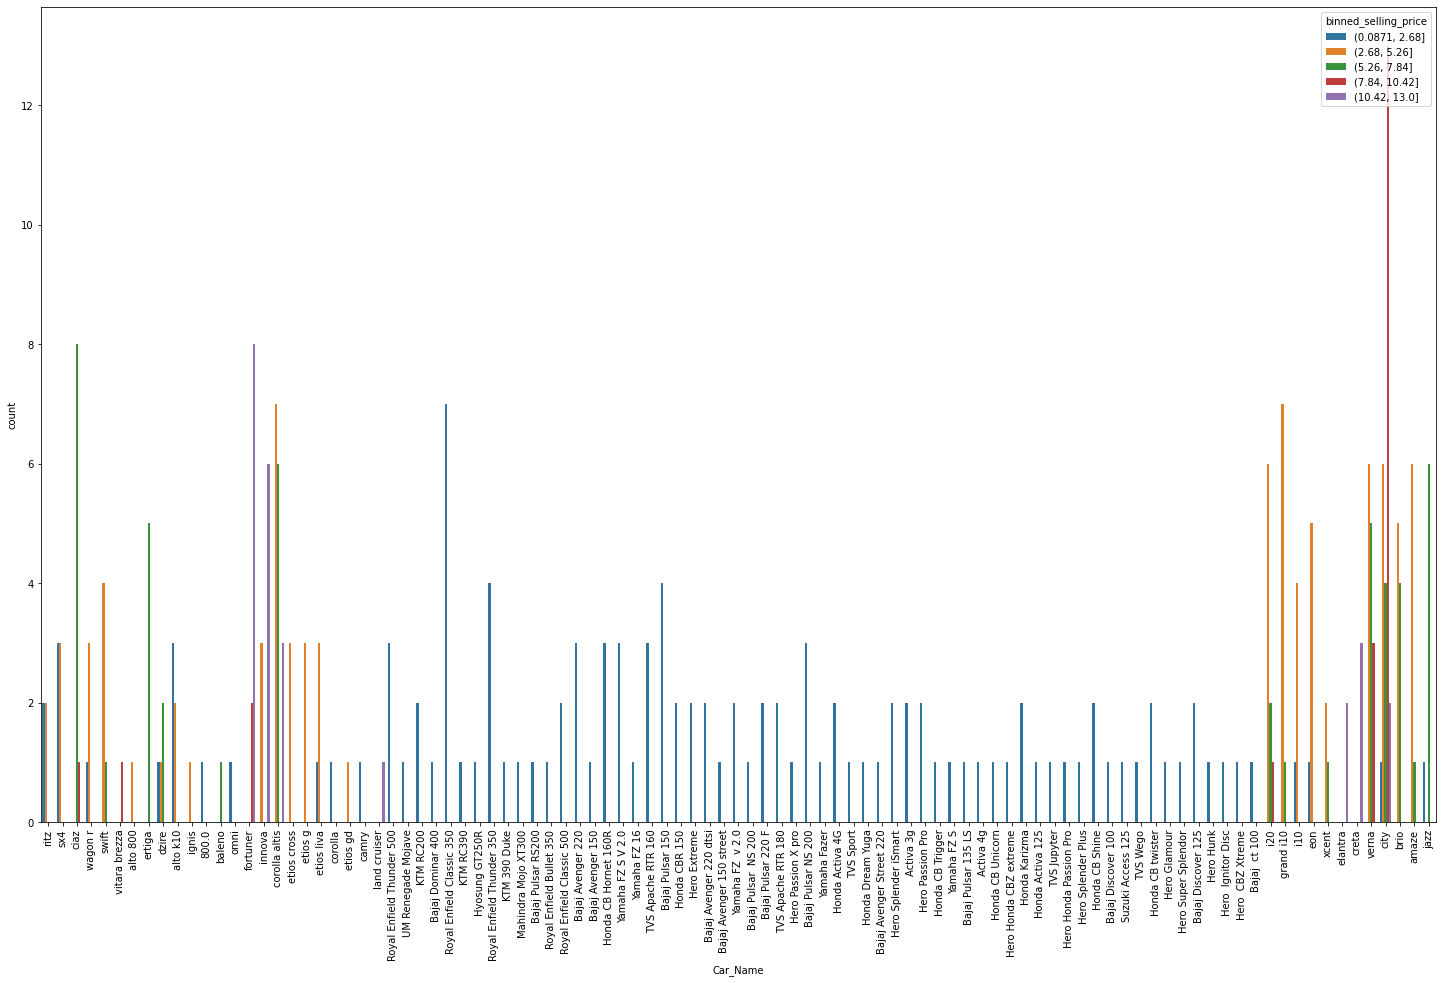

In [17]:
plt.figure(figsize=(25,15))
sns.countplot(x = "Car_Name", hue = "binned_selling_price", data = data)
xticks(rotation = 90)

* you can see here most of the cars are city & corolla altis...
* you can see most of the cars are of less selling which is blue in color
* We donot have much variation in SP with respect to car name. So, we can drop this column for modelling

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

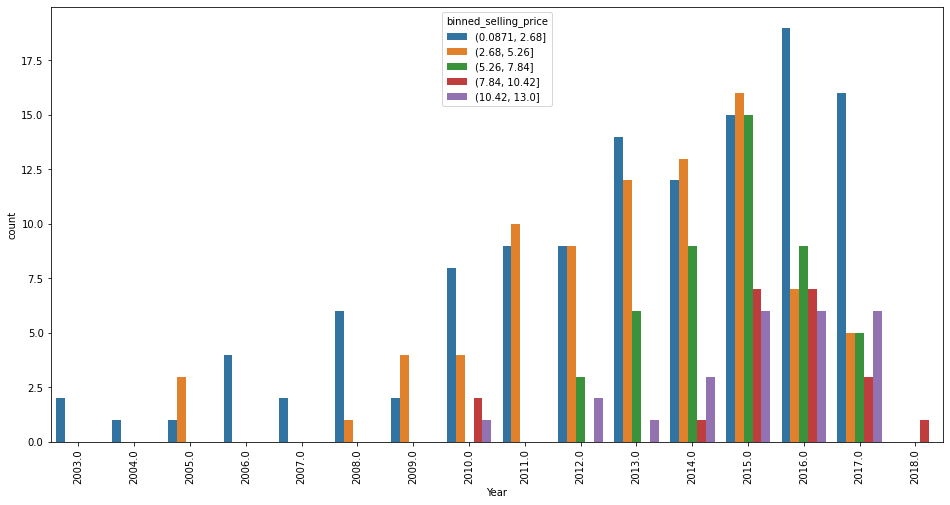

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(x = "Year", hue = "binned_selling_price", data = data)
xticks(rotation = 90)

* Most of the cars are sold in year 2015
* All the cheap cars are widely distributed over the years
* The expensive cars are sold in the year 2010 & 2017 only

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


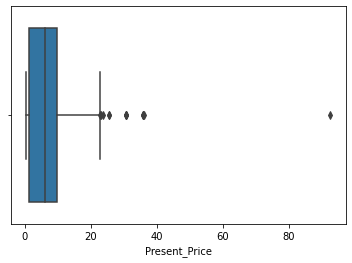

In [19]:
sns.boxplot(data['Present_Price'])

In [20]:
len(data[data['Present_Price']>20])

18

In [21]:
data['Present_Price'] = np.where(data['Present_Price'] > 20, 20, data['Present_Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


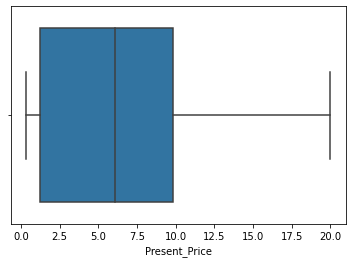

In [22]:
sns.boxplot(data['Present_Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


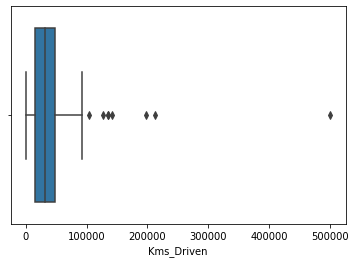

In [23]:
sns.boxplot(data['Kms_Driven'])

In [24]:
len(data[data['Kms_Driven']>100000])

8

In [25]:
data['Kms_Driven'] = np.where(data['Kms_Driven'] > 100000, 100000, data['Kms_Driven'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


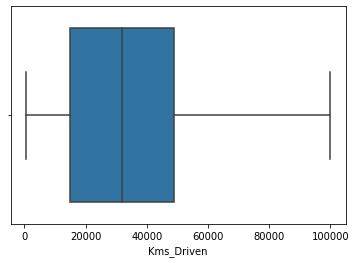

In [26]:
sns.boxplot(data['Kms_Driven'])

#### we can say that most of the cars are driven around 30000 kms according to the box plot

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

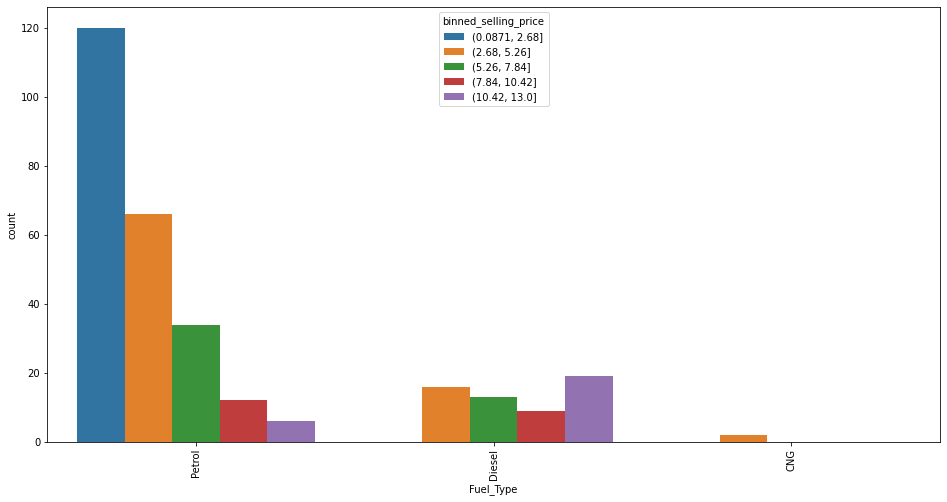

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(x = "Fuel_Type", hue = "binned_selling_price", data = data)
xticks(rotation = 90)

* we can see that all Petrol cars have less Selling price
* Expensive cars are of diesel type
* Cng cars are very less

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

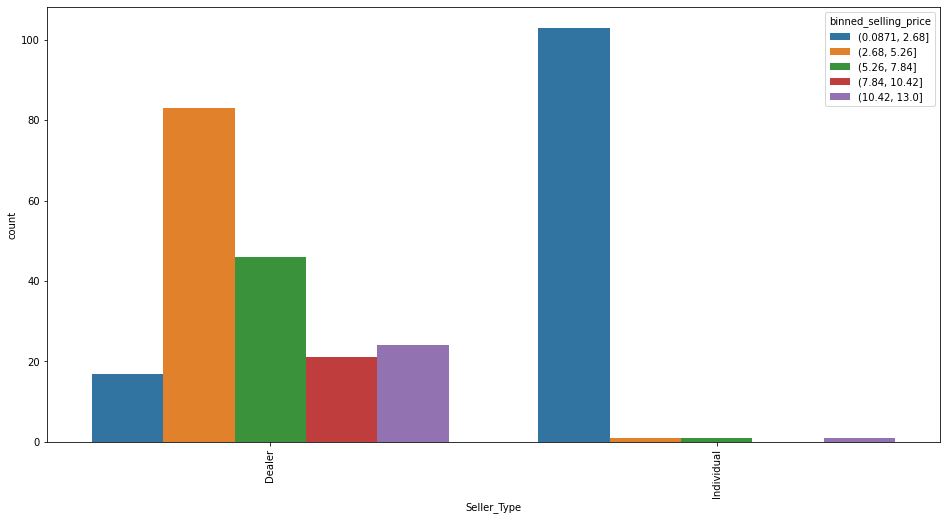

In [28]:
plt.figure(figsize=(16,8))
sns.countplot(x = "Seller_Type", hue = "binned_selling_price", data = data)
xticks(rotation = 90)

* Individual sellers mostly sell cheap cars
* Dealers sell mostly medium range of cars to expensive cars...

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

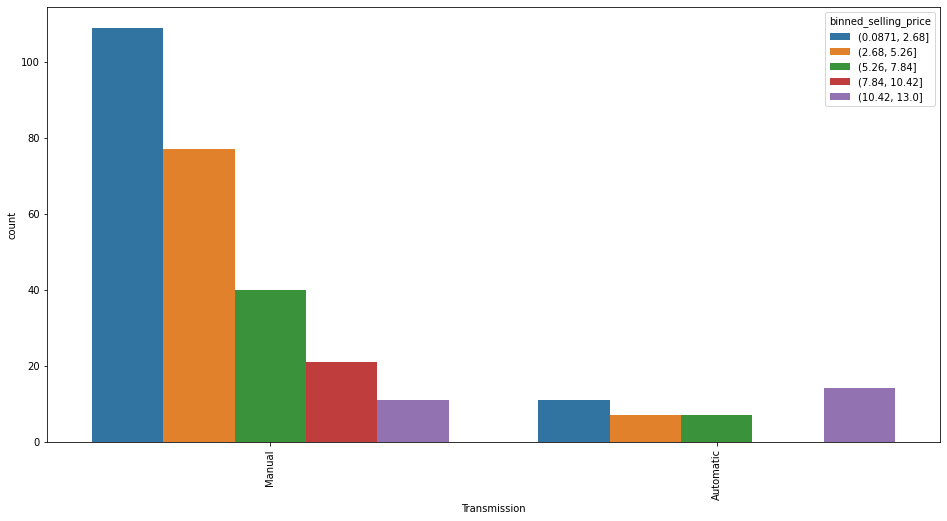

In [29]:
plt.figure(figsize=(16,8))
sns.countplot(x = "Transmission", hue = "binned_selling_price", data = data)
xticks(rotation = 90)

* we can see that expensive cars are moslty of automatic type
* most of the manual cars are cheap in price

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

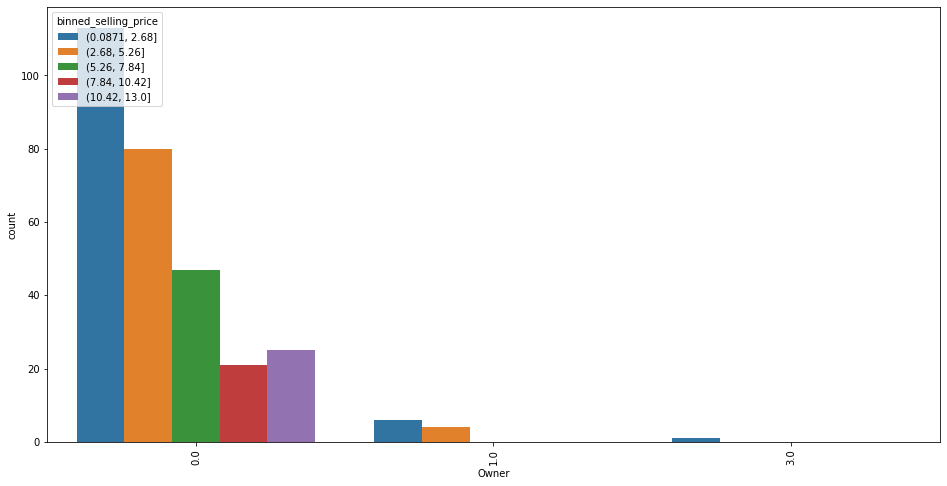

In [30]:
plt.figure(figsize=(16,8))
sns.countplot(x = "Owner", hue = "binned_selling_price", data = data)
xticks(rotation = 90)

# Data Preparation

In [31]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,binned_selling_price
0,ritz,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0,"(2.68, 5.26]"
1,sx4,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0,"(2.68, 5.26]"
2,ciaz,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0,"(5.26, 7.84]"
3,wagon r,2011.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0,"(2.68, 5.26]"
4,swift,2014.0,4.6,6.87,42450.0,Diesel,Dealer,Manual,0.0,"(2.68, 5.26]"


In [32]:
data.drop(['binned_selling_price','Car_Name'],inplace=True,axis=1)

### We are dropping Binned_selling_price & Car_name, as it is of no use...

### COnverting categorical column into dummy columns

In [33]:
cat_col = ['Year','Fuel_Type','Seller_Type','Transmission']

In [34]:
dummy = pd.get_dummies(data[cat_col])

In [35]:
data = pd.concat([data,dummy],axis=1)
data.drop(cat_col,axis=1,inplace=True)

In [36]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Year_2003.0,Year_2004.0,Year_2005.0,Year_2006.0,Year_2007.0,Year_2008.0,...,Year_2016.0,Year_2017.0,Year_2018.0,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,4.75,9.54,43000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,7.25,9.85,6900.0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
3,2.85,4.15,5200.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,4.6,6.87,42450.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [37]:
data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Year_2003.0',
       'Year_2004.0', 'Year_2005.0', 'Year_2006.0', 'Year_2007.0',
       'Year_2008.0', 'Year_2009.0', 'Year_2010.0', 'Year_2011.0',
       'Year_2012.0', 'Year_2013.0', 'Year_2014.0', 'Year_2015.0',
       'Year_2016.0', 'Year_2017.0', 'Year_2018.0', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Dealer',
       'Seller_Type_Individual', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [38]:
X = data.drop(['Selling_Price'],axis=1).values
y = data['Selling_Price'].values

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [42]:
model = rfr.fit(X_train, y_train)

In [43]:
y_pred = model.predict(X_test)

# Model evaluation

In [47]:
from sklearn.metrics import r2_score 
r2_score(y_test,y_pred)

0.8503371605529335

# Error calculation

In [48]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_pred,y_test)**0.5

1.321572659582346

# Summary
* our model is 85% accurate in regression
* Most important feature from above analysis is 'Present_price','FUel_type','Year','KMS_driven'